In [2]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Decision Tree

Tiatnic Survival Dataset

In [3]:
#Load the data sets- train and test
df=pd.read_csv('train_titanic.csv')

In [4]:
#Look at top values of train data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [7]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

<Axes: xlabel='Pclass', ylabel='Survived'>

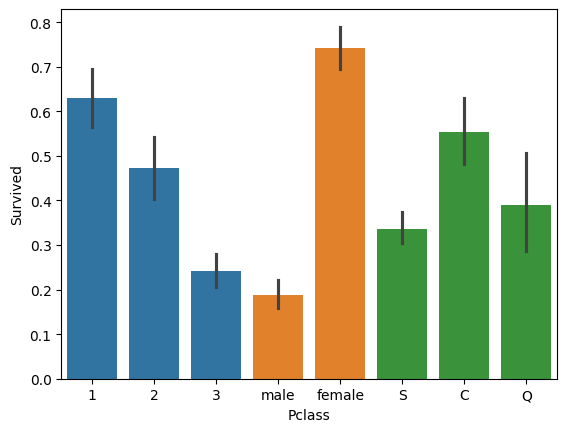

In [8]:
#Barchart of Survived, Pclass, Sex, Embarked
sns.barplot(x='Pclass',y='Survived',data=df)
sns.barplot(x='Sex',y='Survived',data=df)
sns.barplot(x='Embarked',y='Survived',data=df)

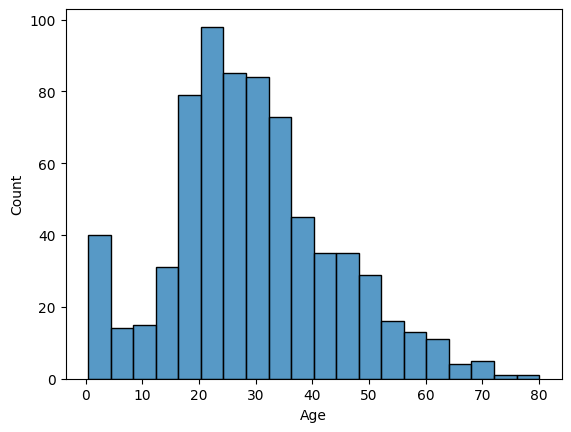

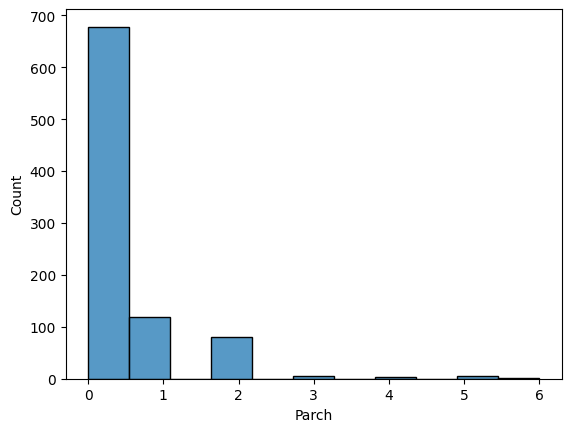

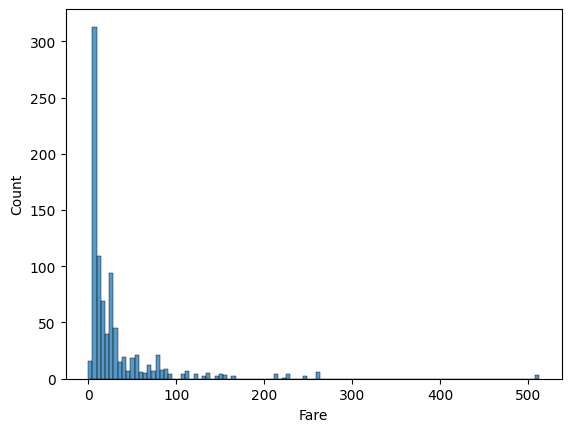

In [9]:
#Histogram of Age, Parch, Fare
sns.histplot(x='Age',data=df)
plt.show()
sns.histplot(x='Parch',data=df)
plt.show()
sns.histplot(x='Fare',data=df)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

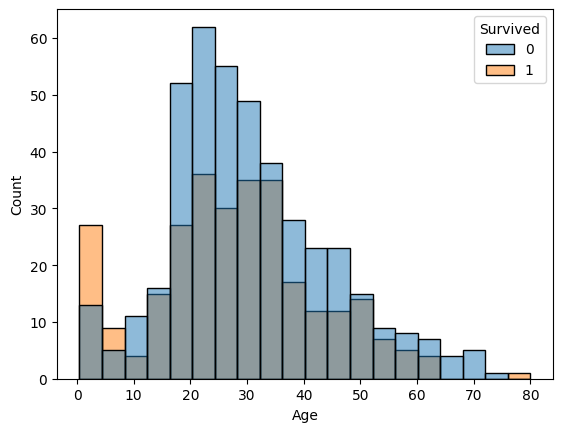

In [10]:
#plot histogram of age for survived and did not survived class
sns.histplot(x='Age',hue='Survived',data=df)

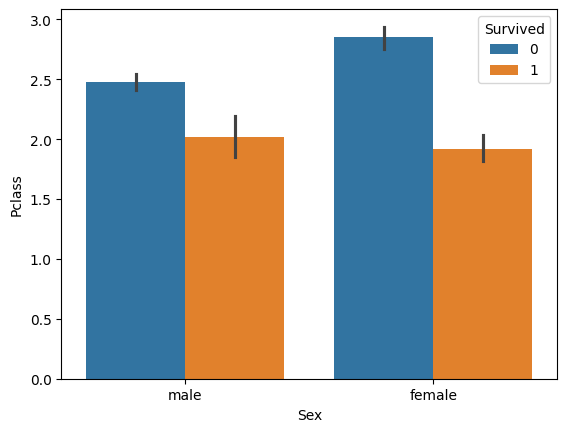

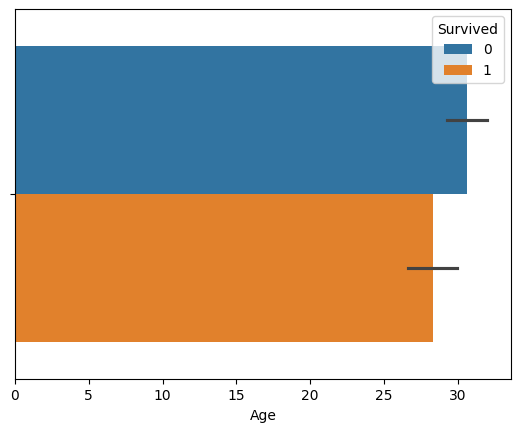

In [11]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
sns.barplot(x='Sex',y='Pclass',hue='Survived', data=df)
plt.show()
sns.barplot(x='Age',hue='Survived', data=df)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

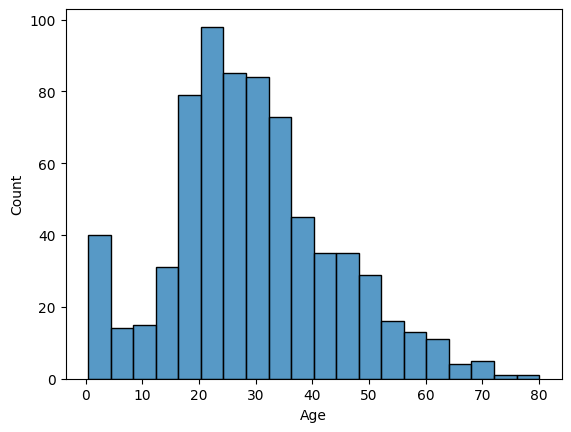

In [12]:
#Histogram of Age of the given data set(sample)
sns.histplot(x='Age',data=df)

## Handling Missing Values

In [13]:
#Replace the msiing values in Embarked column by 'S'
print(df)
df['Embarked'].fillna('S',inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

/tmp/ipykernel_5263/4062866583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [14]:
#converting objects to float
for cols in df.select_dtypes(include='object').columns:
    df[cols]=pd.to_numeric(df[cols],errors='coerce')
print(df.dtypes)



PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object


In [15]:
#Impute the missing values in Fare column with median value

df['Fare'] = df['Fare'].fillna(df['Fare'].median())




In [16]:
#Impute the Age column. It has too many missing values but it may be important.
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
# Impute the Age column

df_imputed = df.copy()
age_mean, age_std = df['Age'].mean(), df['Age'].std()
df_imputed.loc[df['Age'].isnull(), 'Age'] = np.random.normal(age_mean, age_std, df['Age'].isnull().sum())


## Feature Engineering - Creating new features

In [17]:
#Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize']=df['Parch']+df['SibSp']+1

In [75]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = df['FamilySize'] == 1

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


## Create a new attribute Has_cabin using the attribue Cabin.
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [18]:
df['Has_cabin'] = df['Cabin'].notna()
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.0,1,0,7.2500,S,2,False,False
1,1,1,female,38.0,1,0,71.2833,C,2,False,True
2,1,3,female,26.0,0,0,7.9250,S,1,True,False
3,1,1,female,35.0,1,0,53.1000,S,2,False,True
4,0,3,male,35.0,0,0,8.0500,S,1,True,False


## Model Building

In [21]:
#Prepare X and y
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [22]:
# Label encoding of categorical features
encode=LabelEncoder()
X['Sex']=encode.fit_transform(X['Sex'])
X['Embarked']=encode.fit_transform(X['Embarked'])

In [23]:
# concat df_categorical with original df
df=pd.concat([X,y])

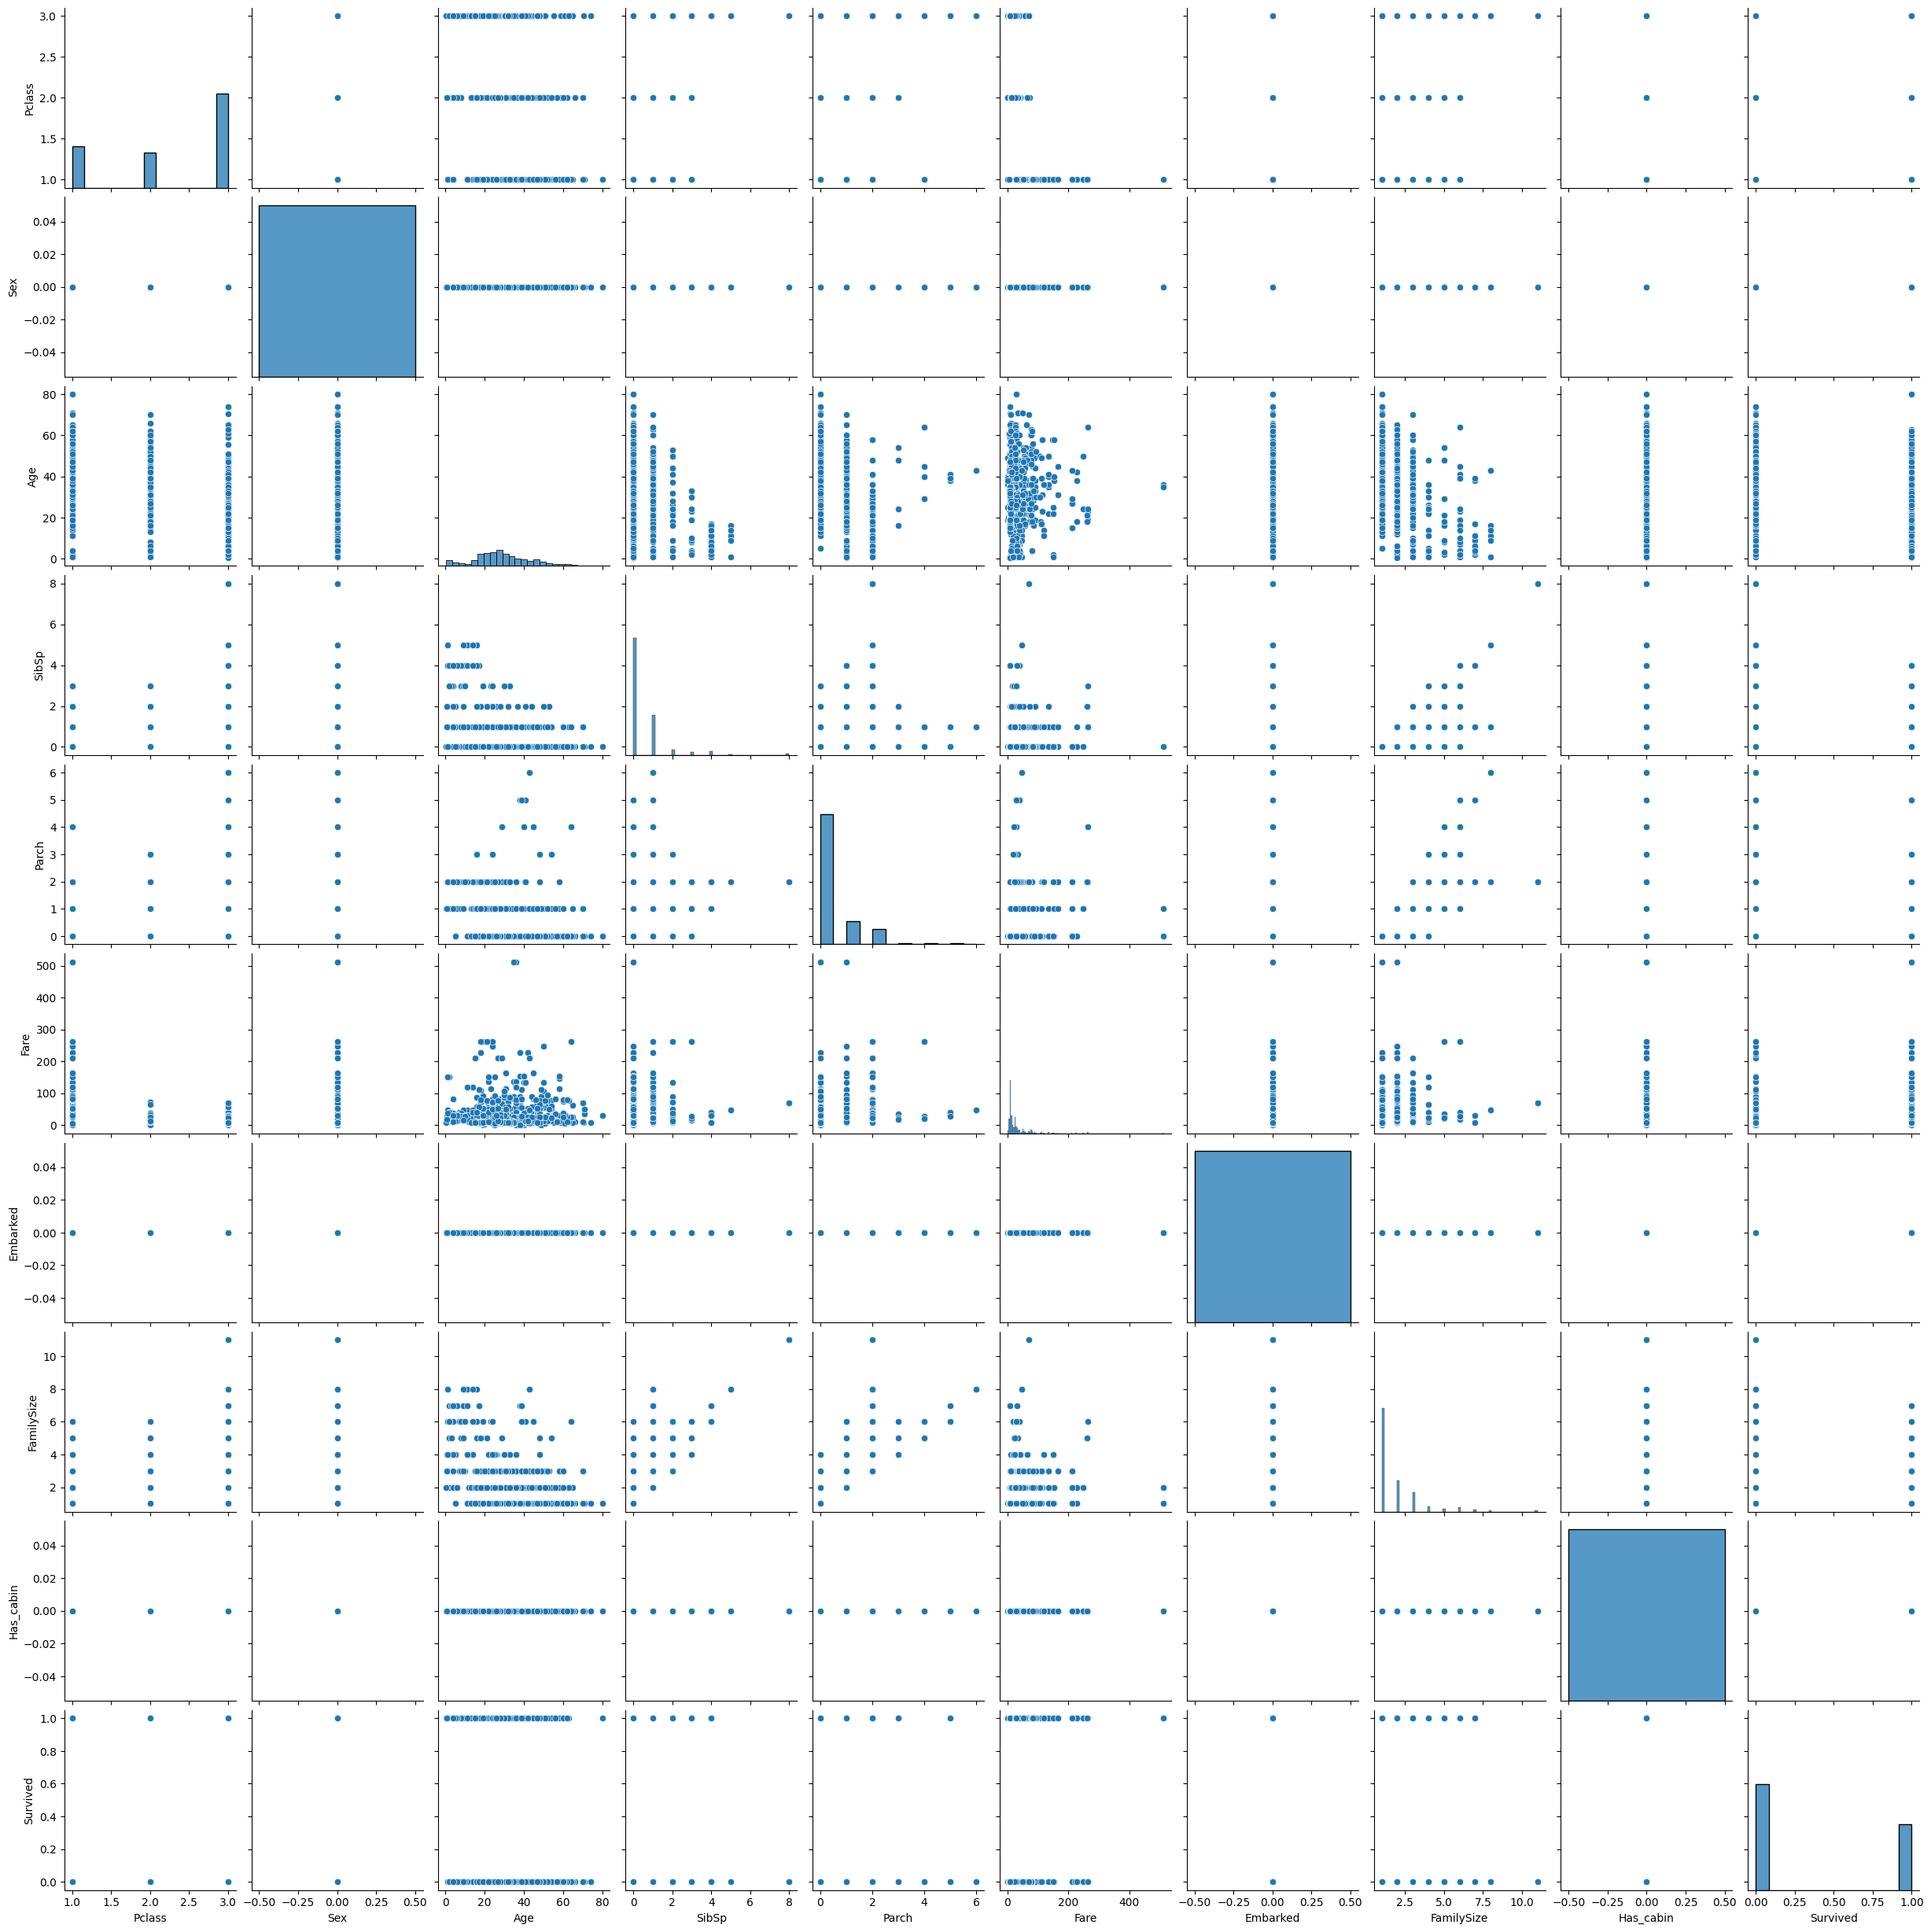

In [25]:
#Do a pairplot of all features
sns.pairplot(df)

In [27]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
X_train, X_test, y_train, y_validation=train_test_split(X,y,test_size=0.1,random_state=2)


In [37]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
# Create object of decision tree classifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

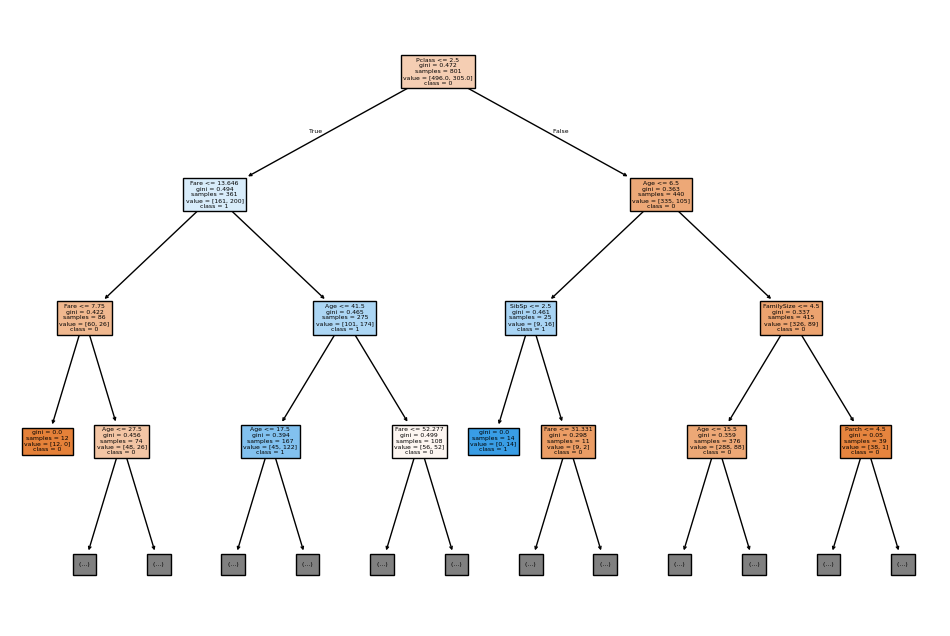

In [38]:
#Print the tree
# Importing required packages for visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, max_depth=3, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

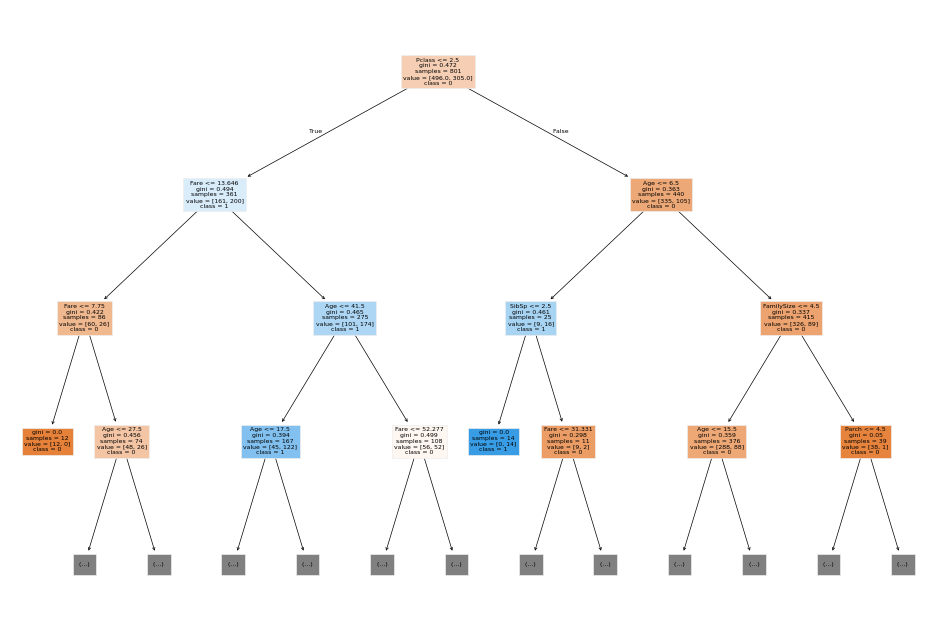

In [40]:
# plotting tree with max_depth=3
plt.figure(figsize=(12, 8))
plt.style.use('ggplot') 
plot_tree(model, max_depth=3, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

<img src="tree2.png">

In [33]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F1 Score (all in one)
print("\nClassification Report:\n", classification_report(y_validation, y_pred))







Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        53
           1       0.52      0.46      0.49        37

    accuracy                           0.60        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.59      0.60      0.60        90



In [34]:
# Printing confusion matrix and accuracy
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Accuracy Score:", accuracy_score(y_validation, y_pred))

Confusion Matrix:
 [[37 16]
 [20 17]]
Accuracy Score: 0.6
